In [88]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [57]:
df=pd.read_csv(r"C:\Users\User\Documents\GitHub\Mental-Health-in-Tech\data\survey.csv")

In [58]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [59]:
df.shape

(1259, 27)

In [11]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [61]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [62]:
df.describe(include="all")

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:43:28,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df['self_employed']=df['self_employed'].fillna('Not specified')

In [64]:
df['state']=df['state'].fillna('Unknown')

In [65]:
df['work_interface']=df['work_interfere'].fillna("Don't know")

In [66]:
df['comments']=df['comments'].fillna('No comment')

In [67]:
df.dropna()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,work_interface
0,2014-08-27 11:29:31,37,Female,United States,IL,Not specified,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,No comment,Often
1,2014-08-27 11:29:37,44,M,United States,IN,Not specified,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,No comment,Rarely
2,2014-08-27 11:29:44,32,Male,Canada,Unknown,Not specified,No,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,No comment,Rarely
3,2014-08-27 11:29:46,31,Male,United Kingdom,Unknown,Not specified,Yes,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,No comment,Often
4,2014-08-27 11:30:22,31,Male,United States,TX,Not specified,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,No comment,Never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2015-08-20 16:52:09,29,male,United States,NC,No,Yes,Yes,Sometimes,100-500,...,Yes,No,Some of them,No,No,Maybe,No,No,No comment,Sometimes
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,No comment,Rarely
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,No,No,Some of them,Yes,No,No,Yes,No,No comment,Often
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Yes,Yes,No,No,No,No,No,No,No comment,Sometimes


In [68]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257    False
1258    False
Length: 1259, dtype: bool

In [69]:
df=df.drop_duplicates()

In [70]:
df=df[(df['Age']>=18)&(df['Age']<=80)]

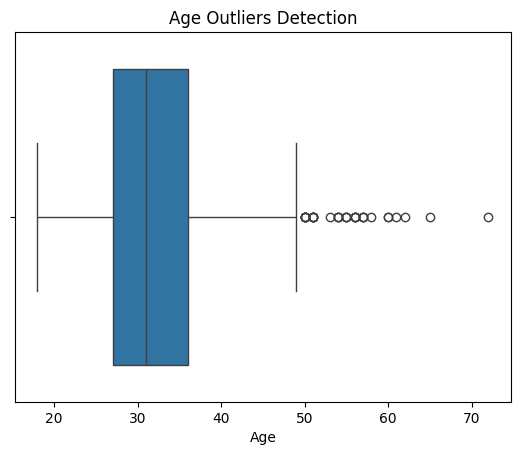

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Age'])
plt.title("Age Outliers Detection")
plt.show()


In [73]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 0 to 1258
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1251 non-null   object
 1   Age                        1251 non-null   int64 
 2   Gender                     1251 non-null   object
 3   Country                    1251 non-null   object
 4   state                      1251 non-null   object
 5   self_employed              1251 non-null   object
 6   family_history             1251 non-null   object
 7   treatment                  1251 non-null   object
 8   work_interfere             989 non-null    object
 9   no_employees               1251 non-null   object
 10  remote_work                1251 non-null   object
 11  tech_company               1251 non-null   object
 12  benefits                   1251 non-null   object
 13  care_options               1251 non-null   object
 14  wellness_prog

,Age
count,1251.000000
mean,32.076739
std,7.288272
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [74]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)]
print("Number of outliers:", outliers.shape[0])

Number of outliers: 32


In [75]:
df['Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())


In [76]:
print(df['Age'].min(), df['Age'].max())


0.0 1.0


In [77]:
df.describe()


,Age
count,1251.000000
mean,0.260680
std,0.134968
min,0.000000
25%,0.166667
50%,0.240741
75%,0.333333
max,1.000000


In [78]:
df.isnull().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                          0
self_employed                  0
family_history                 0
treatment                      0
work_interfere               262
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                       0
work_interface                 0
dtype: int64

In [79]:
df['work_interfere'].fillna(df['work_interfere'].mode()[0], inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_11912\2511887273.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_interfere'].fillna(df['work_interfere'].mode()[0], inplace=True)


In [80]:
df.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
work_interface               0
dtype: int64

In [81]:
print(df['no_employees'].unique())


['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']


In [82]:
mapping = {
    '1-5': 3,
    '6-25': 15,
    '26-100': 63,
    '100-500': 300,
    '500-1000': 750,
    'More than 1000': 1500
}

df['no_employees'] = df['no_employees'].map(mapping)


In [83]:
df['no_employees'].fillna(df['no_employees'].mean(), inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_11912\687341331.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_employees'].fillna(df['no_employees'].mean(), inplace=True)


In [84]:
print(df['no_employees'].dtype)
print(df['no_employees'].head())


int64
0      15
1    1500
2      15
3      63
4     300
Name: no_employees, dtype: int64


In [85]:
cols_to_normalize = ['Age', 'no_employees']


In [86]:
for col in cols_to_normalize:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


In [87]:
print(df[cols_to_normalize].head())
print(df[cols_to_normalize].describe())


        Age  no_employees
0  0.351852      0.008016
1  0.481481      1.000000
2  0.259259      0.008016
3  0.240741      0.040080
4  0.240741      0.198397
               Age  no_employees
count  1251.000000   1251.000000
mean      0.260680      0.287385
std       0.134968      0.399989
min       0.000000      0.000000
25%       0.166667      0.008016
50%       0.240741      0.040080
75%       0.333333      0.498998
max       1.000000      1.000000
